[![Banner-Modelos.png](https://i.postimg.cc/RCgy2XdL/Banner-Modelos.png)](https://postimg.cc/PN8SwbBC)

## L2: Árboles de decisión. Construcción e interpretación.

El objetivo de este notebook es aplicar los conocimientos adquiridos sobre la construcción de modelos basados en árboles de decisión y su interpretación. Se explicará, paso a paso, como: 

1. Preparar los datos para el modelado 
2. Crear un modelo de árbol de decisión.
3. Determinar los atributos más importantes según el modelo. 

El ejemplo que será utilizado, de acuerdo con el caso de uso del sector retail, está relacionado con la deserción de empleados.

Además, puedes utilizar este notebook como guía para la solución de los problemas que se propongan en los ejercicios prácticos y para el proyecto.

###### Autores: David Ocampo (d.ocampo@uniandes.edu.co), Julián Montoya (jc.montoyar@uniandes.edu.co)

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librerías para manejo de datos
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score
#Librerías para visualizar el arbol de decisión
import matplotlib.pyplot as plt
from sklearn import tree

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [2]:
# Se cargan los datos. 
data=pd.read_csv('Datos_C2_Modelos_M4.csv', sep=';', encoding = 'utf-8')

In [3]:
# Cantidad de datos y número de variables
data.shape

(1470, 17)

In [4]:
# Mostrar los datos
data.head()

,Edad,Renuncia,Viaje_negocio,Distacia_desde_casa,Satisfacción_ambiente,Género,Nivel_trabajo,Estatus_marital,Salario_mensual,No_Compañías_anteriores,Sobretiempo,Satisfacción_relaciones,Años_trabajo,Antigüedad,Años_cargo_actual,Última_promoción,Años_manager_actual
0,41,SI,Ocasional,1,2,Femenino,2,Soltero,5993,8,SI,1,8,6,4,0,5
1,49,NO,Frecuentemente,8,3,Masculino,2,Casado,5130,1,NO,4,10,10,7,1,7
2,37,SI,Ocasional,2,4,Masculino,1,Soltero,2090,6,SI,2,7,0,0,0,0
3,33,NO,Frecuentemente,3,4,Femenino,1,Casado,2909,1,SI,3,8,8,7,3,0
4,27,NO,Ocasional,2,1,Masculino,1,Casado,3468,9,NO,4,6,2,2,2,2


### 3. Describir los datos
Ahora podemos hacer una descripción más detallada de nuestros datos.Ten en cuenta que este paso es muy importante para poder determinar problemas de calidad de datos. Además, nos dará información que será útil en la fase de preparación de datos.

In [5]:
# Se realiza el perfilamiento de los datos. En este, se genera información de tipo descriptivo para cada una de las 
# variables numéricas.
data.describe()

,Edad,Distacia_desde_casa,Satisfacción_ambiente,Nivel_trabajo,Salario_mensual,No_Compañías_anteriores,Satisfacción_relaciones,Años_trabajo,Antigüedad,Años_cargo_actual,Última_promoción,Años_manager_actual
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,2.063946,6502.931293,2.693197,2.712245,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.093082,1.106940,4707.956783,2.498009,1.081209,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2911.000000,1.000000,2.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,4919.000000,2.000000,3.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,8379.000000,4.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,4.000000,5.000000,19999.000000,9.000000,4.000000,40.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Categorías que se presentan en la variable categórica "Viaje_negocio" y en qué proporción.
pd.value_counts(data['Viaje_negocio'])

Ocasional         1043
Frecuentemente     277
No-viaja           150
Name: Viaje_negocio, dtype: int64

In [7]:
# Categorías que se presentan en la variable categórica "Género" y en qué proporción.
pd.value_counts(data['Género'])

Masculino    882
Femenino     588
Name: Género, dtype: int64

In [8]:
# Categorías que se presentan en la variable categórica "Estatus_marital" y en qué proporción.
pd.value_counts(data['Estatus_marital'])

Casado        673
Soltero       470
Divorciado    327
Name: Estatus_marital, dtype: int64

In [9]:
# Categorías que se presentan en la variable categórica "Sobretiempo" y en qué proporción.
pd.value_counts(data['Sobretiempo'])

NO    1054
SI     416
Name: Sobretiempo, dtype: int64

Nuestra variable objetivo es "Renuncia", la cual indica si un empleado abandonó la empresa (SI) o se encuentra todavía laborando en esta.

In [10]:
# Categorías que se presentan en la variable categórica "Renuncia" y en qué proporción.
pd.value_counts(data['Renuncia'])

NO    1233
SI     237
Name: Renuncia, dtype: int64

### 3. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados con la eliminación de registros con ausencias y duplicados.

In [11]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [12]:
# Transformación de las variables categóricas de entrada
data_t = pd.get_dummies(data_t, columns=['Viaje_negocio','Género', 'Estatus_marital', 'Sobretiempo'])

In [13]:
# Para hacer la transformación o codificación de la variable objetivo utilizaremos la función labelEncoder. Es importante 
# que tengas en cuenta que, aunque la representación de esta variable sea numérica, la tarea a resolver seguirá siendo 
# una clasificación.
# Primero tenemos que generar el objeto.
codificacion = LabelEncoder()

In [14]:
# Ahora se ajusta a los datos.
data_t['Renuncia']=codificacion.fit_transform(data_t['Renuncia'])

In [15]:
# Visualización de la clase. Observamos que ahora la categoría "SI" está codificada con un "1" y la clase "NO" con un "0"
data_t['Renuncia'].value_counts()

0    1233
1     237
Name: Renuncia, dtype: int64

In [16]:
# Podemos ver cómo quedaron nuestro datos.
data_t.head()

,Edad,Renuncia,Distacia_desde_casa,Satisfacción_ambiente,Nivel_trabajo,Salario_mensual,No_Compañías_anteriores,Satisfacción_relaciones,Años_trabajo,Antigüedad,...,Viaje_negocio_Frecuentemente,Viaje_negocio_No-viaja,Viaje_negocio_Ocasional,Género_Femenino,Género_Masculino,Estatus_marital_Casado,Estatus_marital_Divorciado,Estatus_marital_Soltero,Sobretiempo_NO,Sobretiempo_SI
0,41,1,1,2,2,5993,8,1,8,6,...,0,0,1,1,0,0,0,1,0,1
1,49,0,8,3,2,5130,1,4,10,10,...,1,0,0,0,1,1,0,0,1,0
2,37,1,2,4,1,2090,6,2,7,0,...,0,0,1,0,1,0,0,1,0,1
3,33,0,3,4,1,2909,1,3,8,8,...,1,0,0,1,0,1,0,0,0,1
4,27,0,2,1,1,3468,9,4,6,2,...,0,0,1,0,1,1,0,0,1,0


In [17]:
#revisión del total de registros
data_t.shape

(1470, 23)

### 4. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [18]:
# Se selecciona la variable objetivo, en este caso "Renuncia".
Y=data_t['Renuncia']
# Del conjunto de datos se elimina la variable "Renuncia".
X=data_t.drop(['Renuncia'], axis=1)

In [19]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [20]:
# Creación del objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
# Entrenamiento del modelo de arbol de decisión con los datos de entrenamiento.
arbol = arbol.fit(X_train,Y_train)

In [22]:
# Podemos determinar la exactitud del modelo sobre los datos de test, para determinar su rendimiento de generalización. Esta, y
# otras métricas las estudiaremos en las siguientes lecciones.
y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))

Exactitud: 0.78


### 5. Interpretación del modelo.
Podemos determinar cuáles atributos son los más importantes a partir del modelo generado. Recuerda que estos algoritmos realizan una selección en cada paso de construcción del árbol con base en la medida de pureza.


In [23]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia= arbol.feature_importances_
importancia

array([0.10207194, 0.09062113, 0.06386097, 0.00629047, 0.19124189,
       0.05368191, 0.03993272, 0.04866365, 0.09872115, 0.03787536,
       0.04262166, 0.05540804, 0.01661614, 0.00758079, 0.00646064,
       0.0057832 , 0.00536506, 0.00651151, 0.011716  , 0.0417476 ,
       0.04827075, 0.01895741])

También podemos ordenar y tabular estos coeficientes para facilitar la interpretación.

In [24]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Salario_mensual,0.191242
1,Edad,0.102072
2,Antigüedad,0.098721
3,Distacia_desde_casa,0.090621
4,Satisfacción_ambiente,0.063861
5,Años_manager_actual,0.055408
6,No_Compañías_anteriores,0.053682
7,Años_trabajo,0.048664
8,Sobretiempo_NO,0.048271
9,Última_promoción,0.042622


Ahora vamos a graficar el modelo. Para propósitos de visualización limitaremos la profundidad del árbol a 3. 

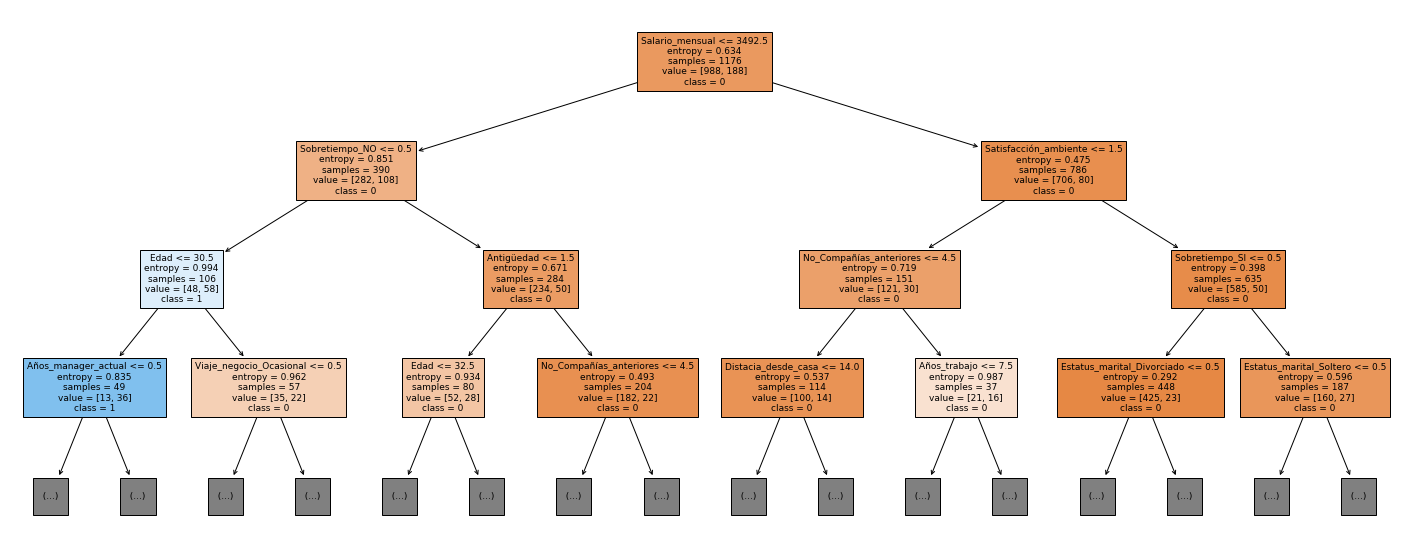

In [25]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [26]:
# También podemos guardar esta figura como una imagen.
fig.savefig("decistion_tree.png")

[![Banner-Modelos.png](https://i.postimg.cc/RCgy2XdL/Banner-Modelos.png)](https://postimg.cc/PN8SwbBC)